
# 🧠 Predicting Generous taxi Tippers of Gotham city using XGBoost

## 🎯 Objective
The purpose of this project is to help Batmobile taxi pvt company's taxi cab drivers **generate more revenue** by predicting whether a customer is likely to be a **generous tipper**. This model can assist in making informed decisions to prioritize trips that offer better tipping potential.

---

## 📦 Dataset
The dataset contains taxi trip-level data including features like:
- Trip distance
- Total amount paid
- Pickup/Drop-off location
- Fare and tip breakdown
- Vendor and rate code details

---

## 🔍 Workflow Overview
1. Data Cleaning & Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Training (XGBoost and Random Forest)
5. Model Evaluation
6. Business Recommendations


In [1]:
#The purpose of this model is to find ways to generate more revenue for taxi cab drivers.
#The goal of this model is to predict whether or not a customer is a generous tipper.

In [2]:
#Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# This is the function that helps plot feature importance
from xgboost import plot_importance

In [3]:
# This lets us see all of the columns.
pd.set_option('display.max_columns', None)


In [4]:
 # Load dataset into dataframe
df0 = pd.read_csv('Batmobile_Taxi_Trip_Data.csv')
# Import predicted fares and mean distance and duration from a previous analysis
gotham_preds_means = pd.read_csv('gotham_preds_means.csv')


In [5]:
 # Inspect the first few rows of df0
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [6]:
# Inspect the first few rows of `gotham_preds_means`
gotham_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


In [7]:
# Merge datasets
df0 = df0.merge(gotham_preds_means,
left_index=True,
right_index=True)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


In [8]:
#Feature engineering
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [9]:
 # Subset the data to isolate only customers who paid by credit card
df1 = df0[df0['payment_type']==1]


---

## 📊 Exploratory Data Analysis (EDA)

We explored feature distributions, correlations, and class balance to understand:
- Tipping behavior
- Fare and trip patterns
- Influence of geographic and temporal features

Key features retained include:
- `total_amount`
- `trip_distance`
- `RatecodeID`
- `VendorID`
- Location IDs (pickup and dropoff)

Visualizations were used to identify potential predictors and clean anomalies.


In [10]:
df1.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
mean_duration            0
mean_distance            0
predicted_fare           0
dtype: int64

In [11]:
df1 = df1.dropna(axis = 0)

In [12]:
df1.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
mean_duration            0
mean_distance            0
predicted_fare           0
dtype: int64

In [13]:
#Create tip % col
df1.loc[:, 'tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

In [14]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200


In [15]:
# Create 'generous' col (target)
df1.loc[:, 'generous'] = (df1['tip_percent'] >= 0.2).astype(int)

In [16]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p',
errors='raise'  # this will raise an error if any format is wrong
)
print(df1['tpep_pickup_datetime'].dtype)
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p',
errors='raise'  # this will raise an error if any format is wrong
)

datetime64[ns]


In [17]:
# Create a 'day' col
df1.loc[:, 'day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()
# Create a 'month' col
df1.loc[:,'month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [18]:
 # Create 'am_rush' col
df1.loc[:,'am_rush'] = df1['tpep_pickup_datetime'].dt.hour
# Create 'daytime' col
df1.loc[:,'daytime'] = df1['tpep_pickup_datetime'].dt.hour
# Create 'pm_rush' col
df1.loc[:,'pm_rush'] = df1['tpep_pickup_datetime'].dt.hour
# Create 'nighttime' col
df1.loc[:,'nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [19]:
# Create time of day binary flags
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if 6 <= x < 10 else 0)
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if 10 <= x < 16 else 0)
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if 16 <= x < 20 else 0)
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour.apply(lambda x: 1 if (20 <= x < 24 or 0 <= x < 6) else 0)

In [20]:
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,month,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,mar,1,0,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,apr,0,1,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,dec,1,0,0,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,may,0,1,0,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,mar,0,0,0,1


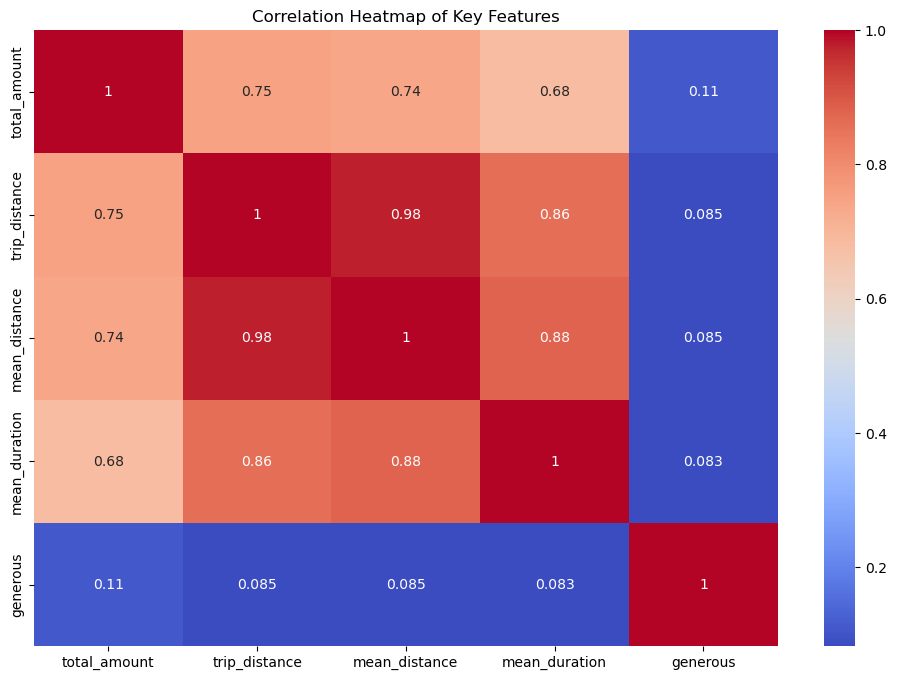

In [21]:
#EDA through visualization
# Correlation heatmap for numerical features
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df1[['total_amount', 'trip_distance', 'mean_distance', 'mean_duration', 'generous']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Key Features")
plt.show()


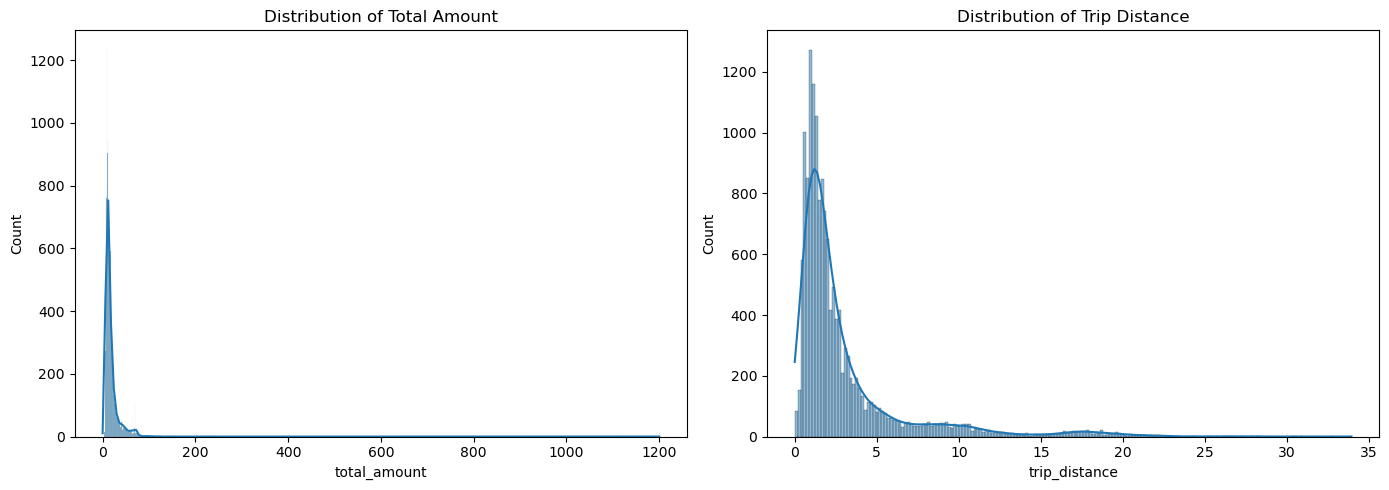

In [22]:
# Histograms of total_amount and trip_distance\n",
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df1['total_amount'], kde=True, ax=axs[0]), axs[0].set_title('Distribution of Total Amount')
sns.histplot(df1['trip_distance'], kde=True, ax=axs[1]), axs[1].set_title('Distribution of Trip Distance')
plt.tight_layout()
plt.show()


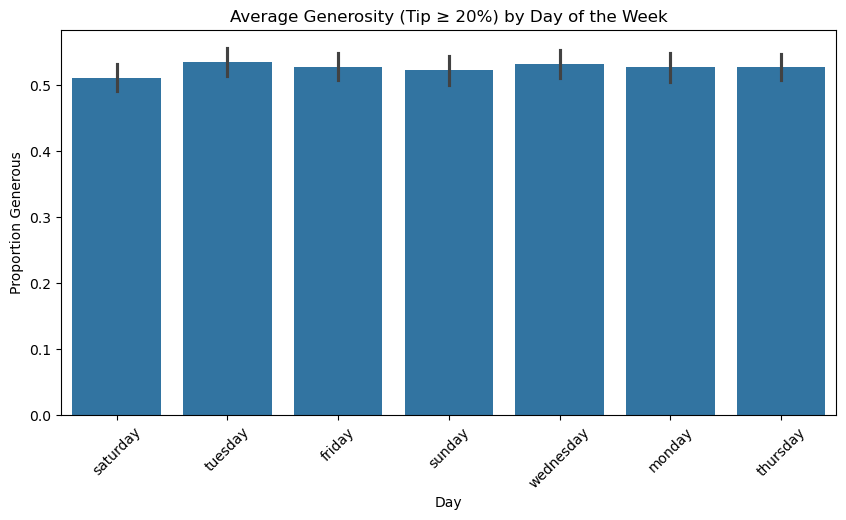

In [23]:
# Tip behavior by day of the week\n",
plt.figure(figsize=(10, 5)),
sns.barplot(data=df1, x='day', y='generous'),
plt.title("Average Generosity (Tip ≥ 20%) by Day of the Week"),
plt.ylabel("Proportion Generous"),
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.show()


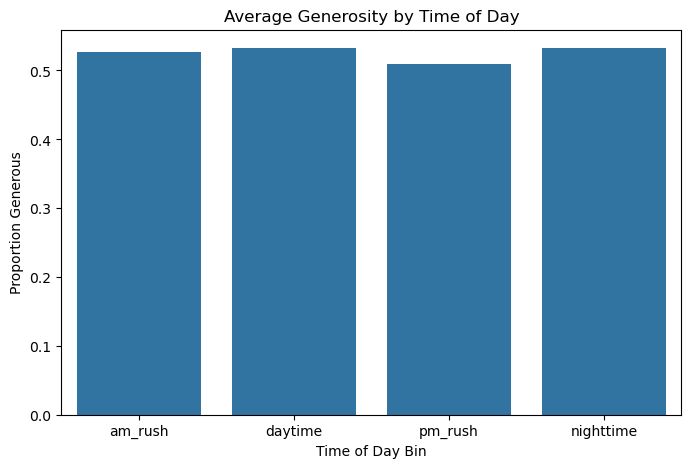

In [24]:
# Tip behavior by time of day bins
time_bins = ['am_rush', 'daytime', 'pm_rush', 'nighttime']
avg_tips_by_time = [df1[df1[t] == 1]['generous'].mean() for t in time_bins]
plt.figure(figsize=(8, 5)),
sns.barplot(x=time_bins, y=avg_tips_by_time)
plt.title("Average Generosity by Time of Day")
plt.ylabel("Proportion Generous")
plt.xlabel("Time of Day Bin")
plt.show()

In [25]:
# Drop columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
'payment_type', 'store_and_fwd_flag','payment_type',
            'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'tip_percent']
df1 = df1.drop(drop_cols, axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   trip_distance    15265 non-null  float64
 3   RatecodeID       15265 non-null  int64  
 4   PULocationID     15265 non-null  int64  
 5   DOLocationID     15265 non-null  int64  
 6   total_amount     15265 non-null  float64
 7   mean_duration    15265 non-null  float64
 8   mean_distance    15265 non-null  float64
 9   predicted_fare   15265 non-null  float64
 10  generous         15265 non-null  int32  
 11  day              15265 non-null  object 
 12  month            15265 non-null  object 
 13  am_rush          15265 non-null  int64  
 14  daytime          15265 non-null  int64  
 15  pm_rush          15265 non-null  int64  
 16  nighttime        15265 non-null  int64  
dtypes: float64(5), in

In [26]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']
# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype('str')

In [27]:
# Convert categoricals to binary
data = pd.get_dummies(df1, drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 349 entries, passenger_count to month_sep
dtypes: bool(338), float64(5), int32(1), int64(5)
memory usage: 6.3 MB


In [28]:
# Get class balance of 'generous' col
data['generous'].value_counts(normalize=True)

generous
1    0.526368
0    0.473632
Name: proportion, dtype: float64

In [59]:
# Isolate target variable (y)
y = data['generous']
# Isolate the features (X)
X = data.drop('generous', axis=1)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [63]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)
# 2. Create a dictionary of hyperparameters to tune and assign a dictionary with ranges of values
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
}
# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']
# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [65]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [67]:
# Examine best score
rf1.best_score_

0.821522524970839

In [69]:
# Examine best hyperparameters
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [74]:
 def make_results(model_name:str, model_object, metric:str):
     # Create dictionary that maps input metric to actual metric name in GridSearchCV
     metric_dict = {'precision': 'mean_test_precision',
                    'recall': 'mean_test_recall',
                    'f1': 'mean_test_f1',
                    'accuracy': 'mean_test_accuracy',
                   }
     # Get all the results from the CV and put them in a df
     cv_results = pd.DataFrame(model_object.cv_results_)
     # Isolate the row of the df with the max(metric) score 
     best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
     # Extract Accuracy, precision, recall, and f1 score from that row
     f1 = best_estimator_results.mean_test_f1
     recall = best_estimator_results.mean_test_recall
     precision = best_estimator_results.mean_test_precision
     accuracy = best_estimator_results.mean_test_accuracy
     # Create table of results
     table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                         },
                        )
     return table

In [76]:
# Call 'make_results()' on the GridSearch object
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.825514,0.817673,0.821523,0.813053


In [ ]:
#This is an good model across the board. Typically scores of 0.82 or better are considered good.

In [78]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

In [80]:
def get_test_scores(model_name:str, preds, y_test_data):
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    table = pd.DataFrame({'model': [model_name],'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                         })
    return table


---

## 🧪 Model Evaluation

We compared **Random Forest** and **XGBoost** using Cross-Validation and Test set performance.

### XGBoost Test Set Results:
- Precision: 0.856
- Recall: 0.882
- F1 Score: 0.869
- Accuracy: 0.860

Confusion matrix and feature importance visualizations were used to interpret results.



### 🔝 Feature Highlight: VendorID_2

The most important predictor in the XGBoost model is `VendorID_2`.

This suggests that the **vendor company providing the ride has a significant impact on tipping behavior**.  
It could indicate:
- Differences in customer experience or service levels across vendors
- Company-specific fare or driver policies
- Varying customer demographics between vendors

📌 Recommendation:
Investigate vendor-specific practices further — if Vendor 2 leads to more generous tipping, insights from their service model could be shared across the fleet to boost tips overall.


In [82]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.825514,0.817673,0.821523,0.813053
0,RF test,0.846641,0.831363,0.838932,0.831969


In [ ]:
#All scores increased by at most ~0.02.
#XGBoost Try to improve our scores using an XGBoost model

In [86]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
# 2. Create a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
            }
# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']
# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [88]:
%%time
xgb1.fit(X_train, y_train)

CPU times: total: 1min 12s
Wall time: 29.5 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [90]:
# Examine best score
xgb1.best_score_

0.8547358457677946

In [92]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

In [94]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.825514,0.817673,0.821523,0.813053
0,RF test,0.846641,0.831363,0.838932,0.831969
0,XGB CV,0.846745,0.862943,0.854736,0.845644


In [96]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

In [100]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.825514,0.817673,0.821523,0.813053
0,RF test,0.846641,0.831363,0.838932,0.831969
0,XGB CV,0.846745,0.862943,0.854736,0.845644
0,XGB test,0.856280,0.882390,0.869139,0.860138
0,XGB test,0.856280,0.882390,0.869139,0.860138


In [ ]:
#XGBoost outperforms Random Forest across all metrics — and not just marginally.
#The biggest gain is in Recall (+6.1%), meaning XGB is better at identifying positive cases, which can be critical depending on your task (e.g., fraud, churn, generosity prediction).
#The overall F1 and Accuracy gains (~3–4%) are substantial and suggest that XGB is more balanced and effective in this setting.

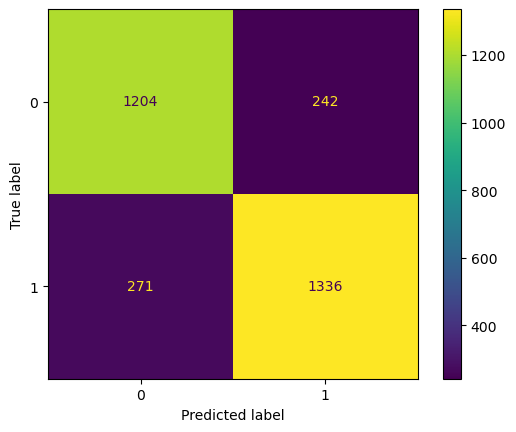

In [102]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=xgb1.classes_)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=xgb1.classes_,
)
disp.plot(values_format='');

In [ ]:
#True Positives (1,336): Model correctly flags generous tippers — these are revenue opportunities.
#False Negatives (271): Generous tippers missed by the model — potential lost earnings.
#False Positives (242): Customers expected to tip well but didn’t — may lead to misallocated service effort.
#Depending on strategic priorities, we can tune the model to further reduce missed generous tippers (false negatives) or lower unnecessary effort (false positives).

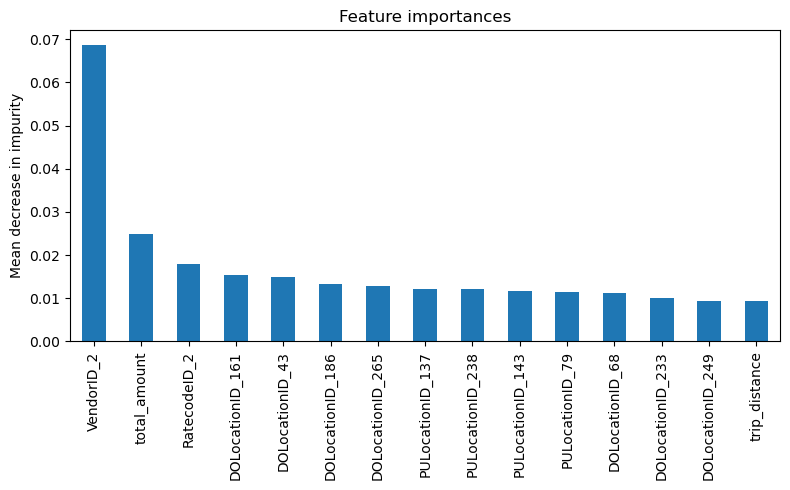

In [104]:
#plot the most important features
importances = xgb1.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)[:15]
fig, ax = plt.subplots(figsize=(8,5))
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

In [ ]:
## ✅ Final Recommendations to Stakeholders

Based on the analysis of model performance, feature importance, and business objectives, the following actions are recommended:

1. **Deploy the XGBoost model** as the final solution to predict generous tippers.  
   - It achieved strong test results: **Accuracy = 86%**, **Recall = 88%**, and **F1 Score = 87%**.

2. **Integrate model outputs into operational decision-making**:
   - Use predictions to help assign drivers to trips with a higher likelihood of generous tips.
   - Provide this insight through a driver dashboard or app notification.

3. The most important feature in the XGBoost model is `VendorID_2`.

    This indicates that the **vendor providing the ride significantly influences tipping behavior**. Possible reasons include:
    - Different customer experiences or service quality between vendors
    - Vendor-specific policies or fare practices
    - Varying demographics or usage patterns among customers per vendor

🚖 **Business Implication**:
    - Vendor 2 appears to be associated with **more generous tipping**.
    - Further analysis of Vendor 2's ride patterns, service quality, and operational differences may reveal strategies to improve tips fleet-wide.

4. **Leverage feature insights to inform business strategy**:
   - Focus on high-impact variables like `Vendor_ID` `total_amount`, `RatecodeID`, and pickup/drop-off zones.
   - Educate drivers about these patterns to increase awareness and optimize service.
   - Share insights or best practices from Vendor 2 with other vendors/drivers.
   - Consider incentivizing routes, shifts, or behaviors aligned with Vendor 2’s profile.

5. **Adjust the decision threshold if needed**:
   - If minimizing missed generous tippers (false negatives) is a higher priority, tune the threshold to favor recall.

6. **Establish a feedback and retraining pipeline**:
   - Continuously collect prediction outcomes and retrain the model quarterly or with major shifts in customer behavior.

7. **Encourage collaboration between tech and ops teams**:
   - Ensure the model is interpretable and actionable for the end users (drivers, support, or dispatch teams).

These recommendations aim to directly **enhance driver earnings** and **support data-driven decision-making** in the taxi operations ecosystem.


---

## ✅ Final Recommendations

1. Deploy the **XGBoost model** for generous tipper prediction.
2. Use predictions to support driver assignment or dynamic pricing strategies.
3. Focus operational strategies on high-impact features like `Vendor_ID`, `total_amount`, `RatecodeID`, and key location zones.
4. Share insights or best practices from Vendor 2 with other vendors/drivers.
5.  Consider incentivizing routes, shifts, or behaviors aligned with Vendor 2’s profile.65. Tune thresholds based on business trade-offs between false positives and negatives.76. Retrain the model quarterly to adapt to shifting customer behaviors.

---  
